Size of training set: 2076
Size of validation set: 259
Size of test set: 259
0.20398537502323885
0.21231470378228057
0.25340293864363106
0.1166056032118646


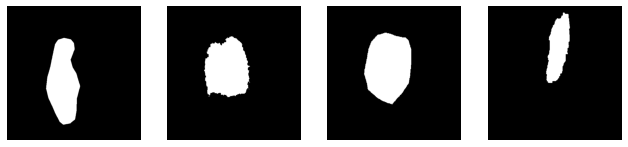

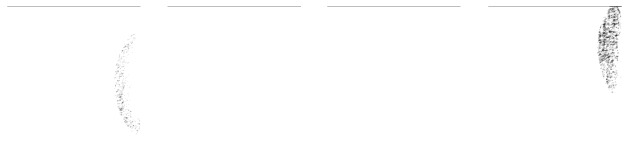

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import glob
import helper

#Getting the filenames for the masks and images, sorting them so corresponding mask match corresponding image
masks = sorted(glob.glob("D:/ISIC2018_Task1_Training_GroundTruth_x2/*.png"))
files = sorted(glob.glob("D:/ISIC2018_Task1-2_Training_Input_x2/*.jpg"))

#We split the data such that train data is 80%, validation and test data are 20%
train_images, train_masks, val_masks, val_images, test_masks, test_images = helper.split_data(files, masks, 0.2, 0.5)

print('Size of training set:', len(train_images))
print('Size of validation set:', len(val_images))
print('Size of test set:', len(test_images))

#We map the filenames and masks to data arrays and shuffle them
train_data = helper.shuffle_map_data(train_images, train_masks)
val_data = helper.shuffle_map_data(val_images, val_masks)
test_data = helper.shuffle_map_data(test_images, test_masks)
        
model = helper.unet()
model.compile(optimizer='adam',
             loss ='categorical_crossentropy',
             metrics=[helper.dice_coef, 'accuracy'])
#Predictions before training our model on the validation data
#The dice coefficients is printed in order for each image
helper.predictions(val_data, model)
    

In [3]:
history = model.fit(train_data.batch(32), epochs = 6, validation_data = val_data.batch(32))

Train for 65 steps, validate for 9 steps
Epoch 1/6
65/65 [==============================] - 59s 902ms/step - loss: 0.5984 - dice_coef: 0.5808 - accuracy: 0.7629 - val_loss: 0.5304 - val_dice_coef: 0.6768 - val_accuracy: 0.7479
Epoch 2/6
65/65 [==============================] - 48s 737ms/step - loss: 0.4316 - dice_coef: 0.7168 - accuracy: 0.8077 - val_loss: 0.4722 - val_dice_coef: 0.7376 - val_accuracy: 0.7479
Epoch 3/6
65/65 [==============================] - 58s 895ms/step - loss: 0.3902 - dice_coef: 0.7505 - accuracy: 0.8077 - val_loss: 0.3553 - val_dice_coef: 0.7574 - val_accuracy: 0.7479
Epoch 4/6
65/65 [==============================] - 48s 737ms/step - loss: 0.3508 - dice_coef: 0.7785 - accuracy: 0.8077 - val_loss: 0.3448 - val_dice_coef: 0.8010 - val_accuracy: 0.7479
Epoch 5/6
65/65 [==============================] - 58s 889ms/step - loss: 0.3252 - dice_coef: 0.7969 - accuracy: 0.8077 - val_loss: 0.3386 - val_dice_coef: 0.7618 - val_accuracy: 0.7479
Epoch 6/6
65/65 [============

0.7921360973411447
0.4695324337975323
0.9092066861236402
0.5955860473733557
0.5200163398692811
0.9037529369430392
0.8204108681245859
0.9533028900287752
0.6525057825751734
0.35373828496328386


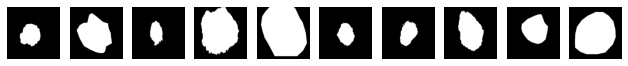

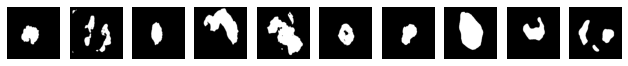

In [12]:
#Predictions on the test data
helper.predictions(test_data, model, 10)

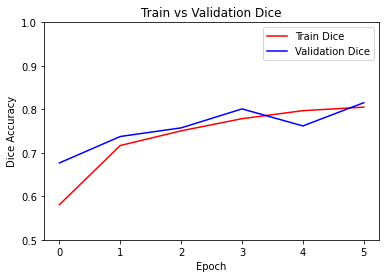

In [23]:
train_coef = history.history['dice_coef']
val_coef = history.history['val_dice_coef']


epochs = range(6)

plt.figure()
plt.plot(epochs, train_coef, 'r', label='Train Dice')
plt.plot(epochs, val_coef, 'b', label='Validation Dice')
plt.title('Train vs Validation Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice Accuracy')
plt.ylim([0.5, 1])
plt.legend()
plt.show()

In [7]:
#Testing our model against Test set
results = model.evaluate(test_data.batch(32))

9/9 [==============================] - 2s 236ms/step - loss: 0.4185 - dice_coef: 0.7725 - accuracy: 0.8531


In [ ]:
print()